<a href="https://colab.research.google.com/github/dbtjr1103/Basic_practice/blob/main/K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80_%EB%AA%A8%EB%8D%B8(perch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8. K최근접 이웃 회귀 모델 소개

In [1]:
import pandas as pd

perch = pd.read_csv("perch.csv")
perch

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0
5,18.0,100.0
6,18.7,78.0
7,19.0,80.0
8,19.6,85.0
9,20.0,85.0


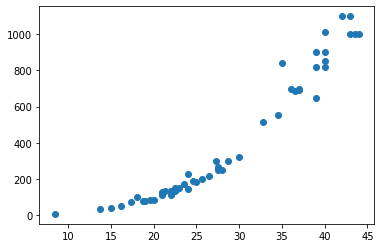

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch['length'], perch['weight'])

In [3]:
data = perch['length'].to_numpy()
target = perch['weight'].to_numpy()

data # 문제지로, 2차원 행렬이어야하는데 1차원 행렬

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

In [4]:
data2 = data.reshape(-1, 1) #자동행, 2차원행렬로 변경
data2

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data2, target)

In [6]:
# 길이데이터 하나만 있기때문에 데이터 표준화 X
# 바로 모델생성
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(train_input, train_target)
knn.score(test_input, test_target)

0.9420227117411762

In [7]:
test_target

array([250. , 130. , 514. , 110. ,  85. ,   5.9, 690. , 820. , 145. ,
       150. , 700. , 900. , 650. , 197. ])

In [8]:
knn.predict(test_input)

array([258.6, 131. , 620.2, 127. ,  95.6,  58.7, 720.2, 937. , 131. ,
       131. , 720.2, 854. , 854. , 191.2])

In [9]:
len(train_input)

42

In [10]:
# 최상위모델 찾기
from sklearn.neighbors import KNeighborsRegressor

for n in range(1, 43):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(train_input, train_target)
    score = knn.score(test_input, test_target)  
    print("이웃수:{} / 정밀도:{}".format(n, score))

이웃수:1 / 정밀도:0.9390522930820544
이웃수:2 / 정밀도:0.9009493469909846
이웃수:3 / 정밀도:0.9307437082250418
이웃수:4 / 정밀도:0.9321267564140105
이웃수:5 / 정밀도:0.9420227117411762
이웃수:6 / 정밀도:0.9405065532202416
이웃수:7 / 정밀도:0.9273707079393313
이웃수:8 / 정밀도:0.9215067541075163
이웃수:9 / 정밀도:0.9015715848723128
이웃수:10 / 정밀도:0.8882883699847635
이웃수:11 / 정밀도:0.8982805747675136
이웃수:12 / 정밀도:0.8878973225470107
이웃수:13 / 정밀도:0.9120345454024843
이웃수:14 / 정밀도:0.9210462821517738
이웃수:15 / 정밀도:0.9424452315223171
이웃수:16 / 정밀도:0.9542992925384021
이웃수:17 / 정밀도:0.9561296369565357
이웃수:18 / 정밀도:0.950636382531731
이웃수:19 / 정밀도:0.9417851250613711
이웃수:20 / 정밀도:0.9291515361906004
이웃수:21 / 정밀도:0.9105018923530812
이웃수:22 / 정밀도:0.8916724098406853
이웃수:23 / 정밀도:0.8745486868044781
이웃수:24 / 정밀도:0.8497970012767497
이웃수:25 / 정밀도:0.8244189190161035
이웃수:26 / 정밀도:0.8001721432019188
이웃수:27 / 정밀도:0.7750322241695419
이웃수:28 / 정밀도:0.747497435265889
이웃수:29 / 정밀도:0.7204691452454575
이웃수:30 / 정밀도:0.6882509561346644
이웃수:31 / 정밀도:0.648527991153047
이웃수:32 / 정밀도:0.60969

In [11]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=6)

In [12]:
test_target

array([250. , 130. , 514. , 110. ,  85. ,   5.9, 690. , 820. , 145. ,
       150. , 700. , 900. , 650. , 197. ])

In [13]:
knn.predict(test_input)

array([265.5       , 137.5       , 566.83333333, 124.16666667,
        98.83333333,  61.91666667, 769.33333333, 964.16666667,
       137.5       , 137.5       , 769.33333333, 828.33333333,
       828.33333333, 209.33333333])

In [14]:
knn.score(test_input, test_target)

0.9405065532202416

In [15]:
import numpy as np

np.mean(abs(test_target - knn.predict(test_input)))
# 차이 평균

52.501190476190494